In [30]:
# This script will do some basic exploratory statistical analysis
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

ruta = 'C:/Users/j.rodriguez.villegas/Documents/optimization/01_data/configuration_file.xlsx'
df = pd.read_excel(ruta, sheet_name = 'Historical_data')
print("The DataFrame is: \n")
df.head(10)

The DataFrame is: 



,Date,Asset,Open,High,Low,Close,Adj Close,Volume,ROI
0,2013-09-01,AAPL,17.610000,18.140000,15.970000,17.030000,14.860000,8630941200,-0.156161
1,2013-09-01,ACN,72.720001,78.339996,72.360001,73.639999,61.282059,70562800,-0.157287
2,2013-09-01,AMZN,14.236500,16.028500,14.208500,15.632000,15.632000,869376000,0.098023
3,2013-09-01,GOOG,21.279240,22.565170,21.269028,21.815977,21.815977,1329906200,0.025224
4,2013-09-01,SLB,81.690002,89.720001,81.680000,88.360001,67.575027,126421200,-0.172787
5,2013-09-01,TSLA,11.560000,12.966667,10.567333,12.891333,12.891333,2568159000,0.115167
6,2013-09-01,META,41.840000,51.599998,41.439999,50.230000,50.230000,1583083800,0.200526
7,2013-09-01,CRM,49.459999,54.250000,48.020000,51.910000,51.910000,105773900,0.049535
8,2013-09-01,V,44.007500,50.215000,43.762501,47.775002,44.554924,284857200,0.012439
9,2013-09-01,KR,18.485001,20.709999,18.355000,20.170000,16.831999,176151400,-0.089424


In [31]:
df.shape

(2040, 9)

In [32]:
# Accenture
accenture = df[df['Asset'].isin(['ACN'])]

print(accenture)

           Date Asset        Open        High         Low       Close  \
1    2013-09-01   ACN   72.720001   78.339996   72.360001   73.639999   
18   2013-10-01   ACN   73.540001   75.260002   69.779999   73.500000   
35   2013-11-01   ACN   73.889999   79.449997   72.330002   77.470001   
52   2013-12-01   ACN   77.419998   83.449997   73.790001   82.220001   
69   2014-01-01   ACN   81.500000   85.879997   78.820000   79.879997   
...         ...   ...         ...         ...         ...         ...   
1956 2023-04-01   ACN  283.390015  288.649994  270.200012  280.290009   
1973 2023-05-01   ACN  279.089996  318.910004  261.679993  305.920013   
1990 2023-06-01   ACN  305.730011  327.929993  296.000000  308.579987   
2007 2023-07-01   ACN  308.000000  324.190002  304.119995  316.350006   
2024 2023-08-01   ACN  315.440002  326.230011  301.309998  323.769989   

       Adj Close    Volume       ROI  
1      61.282059  70562800 -0.157287  
18     61.165546  69020600 -0.168268  
35    

In [33]:
accenture.shape

(120, 9)

In [34]:
accenture.head()

,Date,Asset,Open,High,Low,Close,Adj Close,Volume,ROI
1,2013-09-01,ACN,72.720001,78.339996,72.360001,73.639999,61.282059,70562800,-0.157287
18,2013-10-01,ACN,73.540001,75.260002,69.779999,73.500000,61.165546,69020600,-0.168268
35,2013-11-01,ACN,73.889999,79.449997,72.330002,77.470001,65.323891,61371800,-0.115931
52,2013-12-01,ACN,77.419998,83.449997,73.790001,82.220001,69.329193,75326700,-0.104505
69,2014-01-01,ACN,81.500000,85.879997,78.820000,79.879997,67.356049,70394800,-0.173545


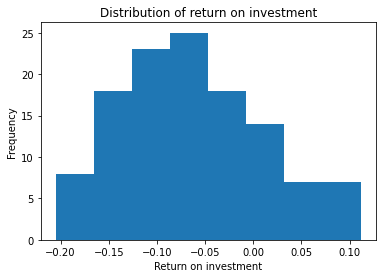

In [35]:
distribution = accenture['ROI']
classes = round(1 + 3.333 * np.log10(len(distribution)))

# Create the histogram
plt.hist(distribution, bins=classes)

# Add labels and title
plt.xlabel('Return on investment')
plt.ylabel('Frequency')
plt.title('Distribution of return on investment')

# Show the plot
plt.show()

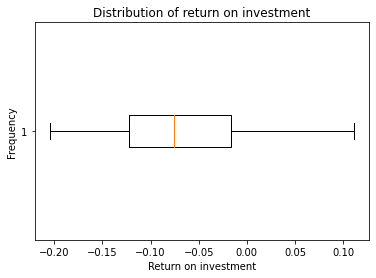

In [36]:
# Create the boxplot
plt.boxplot(distribution, vert = False)

# Add labels and title
plt.xlabel('Return on investment')
plt.ylabel('Frequency')
plt.title('Distribution of return on investment')

# Show the plot
plt.show()

In [37]:
norm_dist = distribution
fit_loc, fit_scale = stats.norm.fit(norm_dist)
# Print the estimated parameters
print("Estimated loc parameter (mu): ", fit_loc)
print("Estimated scale parameter (sigma): ", fit_scale)

Estimated loc parameter (mu):  -0.06295426785021321
Estimated scale parameter (sigma):  0.07379011307277203


In [38]:
# Calculate the expected value
expected_value = stats.norm.mean(loc = fit_loc, scale = fit_scale)
print("The expectation of the random variable is: ", expected_value)

The expectation of the random variable is:  -0.06295426785021321


In [39]:
# Calculate the variance
variance = stats.norm.var(loc = fit_loc, scale = fit_scale)
print("The variance of the random variable is: ", variance)

The variance of the random variable is:  0.0054449807872924815


In [40]:
# Use goodness of fit test (Hypothesis testing) to validate the theoretical distribution

statistic, p_value = stats.shapiro(norm_dist)

# Print the test statistic and p-value
alpha = 0.02  # Significance level
print(f"Shapiro-Wilk Statistic: {statistic}")
print(f"P-value: {p_value}")

# Interpret the results
if p_value >= alpha:
    print("The data follows a normal distribution (not significant)")
else:
    print("The data does not follow a normal distribution (significant)")

Shapiro-Wilk Statistic: 0.9774160981178284
P-value: 0.04101752117276192
The data follows a normal distribution (not significant)


In [41]:
# Apple
apple = df[df['Asset'].isin(['AAPL'])]

print(apple)

           Date Asset    Open    High     Low   Close  Adj Close      Volume  \
0    2013-09-01  AAPL   17.61   18.14   15.97   17.03      14.86  8630941200   
17   2013-10-01  AAPL   17.09   19.26   17.08   18.67      16.29  7837732000   
34   2013-11-01  AAPL   18.72   19.94   18.30   19.86      17.33  5225155600   
51   2013-12-01  AAPL   19.93   20.54   19.24   20.04      17.59  7057397200   
68   2014-01-01  AAPL   19.85   20.01   17.63   17.88      15.69  8765954400   
...         ...   ...     ...     ...     ...     ...        ...         ...   
1955 2023-04-01  AAPL  164.27  169.85  159.78  169.68     169.22   969709700   
1972 2023-05-01  AAPL  169.28  179.35  164.31  177.25     176.77  1275155500   
1989 2023-06-01  AAPL  177.70  194.48  176.93  193.97     193.71  1297101100   
2006 2023-07-01  AAPL  193.78  198.23  186.60  196.45     196.19   996066400   
2023 2023-08-01  AAPL  196.24  196.73  171.96  187.87     187.62  1322439400   

           ROI  
0    -0.156161  
17   

In [42]:
apple.shape

(120, 9)

In [43]:
apple.head()

,Date,Asset,Open,High,Low,Close,Adj Close,Volume,ROI
0,2013-09-01,AAPL,17.61,18.14,15.97,17.03,14.86,8630941200,-0.156161
17,2013-10-01,AAPL,17.09,19.26,17.08,18.67,16.29,7837732000,-0.046811
34,2013-11-01,AAPL,18.72,19.94,18.30,19.86,17.33,5225155600,-0.074252
51,2013-12-01,AAPL,19.93,20.54,19.24,20.04,17.59,7057397200,-0.117411
68,2014-01-01,AAPL,19.85,20.01,17.63,17.88,15.69,8765954400,-0.209572


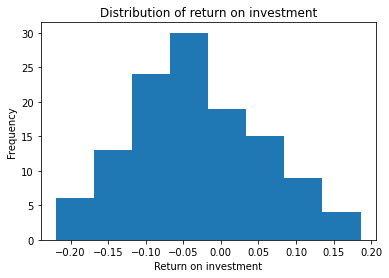

In [44]:
distribution = apple['ROI']
classes = round(1 + 3.333 * np.log10(len(distribution)))

# Create the histogram
plt.hist(distribution, bins=classes)

# Add labels and title
plt.xlabel('Return on investment')
plt.ylabel('Frequency')
plt.title('Distribution of return on investment')

# Show the plot
plt.show()

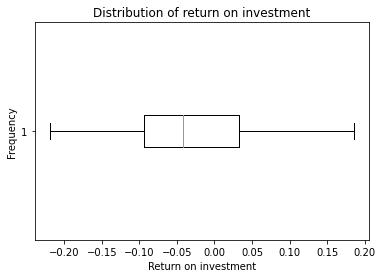

In [45]:
# Create the boxplot
plt.boxplot(distribution, vert = False)

# Add labels and title
plt.xlabel('Return on investment')
plt.ylabel('Frequency')
plt.title('Distribution of return on investment')

# Show the plot
plt.show()

In [46]:
norm_dist = distribution
fit_loc, fit_scale = stats.norm.fit(norm_dist)
# Print the estimated parameters
print("Estimated loc parameter (mu): ", fit_loc)
print("Estimated scale parameter (sigma): ", fit_scale)

Estimated loc parameter (mu):  -0.032118307886835756
Estimated scale parameter (sigma):  0.08714920826199771


In [47]:
# Calculate the expected value
expected_value = stats.norm.mean(loc = fit_loc, scale = fit_scale)
print("The expectation of the random variable is: ", expected_value)

The expectation of the random variable is:  -0.032118307886835756


In [48]:
# Calculate the variance
variance = stats.norm.var(loc = fit_loc, scale = fit_scale)
print("The variance of the random variable is: ", variance)

The variance of the random variable is:  0.0075949845006930495


In [49]:
# Use goodness of fit test (Hypothesis testing) to validate the theoretical distribution

statistic, p_value = stats.shapiro(norm_dist)

# Print the test statistic and p-value
alpha = 0.02  # Significance level
print(f"Shapiro-Wilk Statistic: {statistic}")
print(f"P-value: {p_value}")

# Interpret the results
if p_value >= alpha:
    print("The data follows a normal distribution (not significant)")
else:
    print("The data does not follow a normal distribution (significant)")

Shapiro-Wilk Statistic: 0.9896529316902161
P-value: 0.5038782954216003
The data follows a normal distribution (not significant)


In [50]:
# Amazon
amazon = df[df['Asset'].isin(['AMZN'])]

print(amazon)

           Date Asset        Open        High         Low       Close  \
2    2013-09-01  AMZN   14.236500   16.028500   14.208500   15.632000   
19   2013-10-01  AMZN   15.711000   18.420000   14.825000   18.201500   
36   2013-11-01  AMZN   18.281500   19.705000   17.094000   19.681000   
53   2013-12-01  AMZN   19.950001   20.281500   18.975000   19.939501   
70   2014-01-01  AMZN   19.940001   20.403000   17.888000   17.934500   
...         ...   ...         ...         ...         ...         ...   
1957 2023-04-01  AMZN  102.300003  110.860001   97.709999  105.449997   
1974 2023-05-01  AMZN  104.949997  122.919998  101.150002  120.580002   
1991 2023-06-01  AMZN  120.690002  131.490005  119.930000  130.360001   
2008 2023-07-01  AMZN  130.820007  136.649994  125.919998  133.679993   
2025 2023-08-01  AMZN  133.550003  143.630005  126.410004  138.009995   

       Adj Close      Volume       ROI  
2      15.632000   869376000  0.098023  
19     18.201500  1545908000  0.158520  


In [51]:
amazon.shape

(120, 9)

In [52]:
amazon.head()

,Date,Asset,Open,High,Low,Close,Adj Close,Volume,ROI
2,2013-09-01,AMZN,14.236500,16.0285,14.2085,15.632000,15.632000,869376000,0.098023
19,2013-10-01,AMZN,15.711000,18.4200,14.8250,18.201500,18.201500,1545908000,0.158520
36,2013-11-01,AMZN,18.281500,19.7050,17.0940,19.681000,19.681000,1084154000,0.076553
53,2013-12-01,AMZN,19.950001,20.2815,18.9750,19.939501,19.939501,1113734000,-0.000526
70,2014-01-01,AMZN,19.940001,20.4030,17.8880,17.934500,17.934500,1620238000,-0.100577


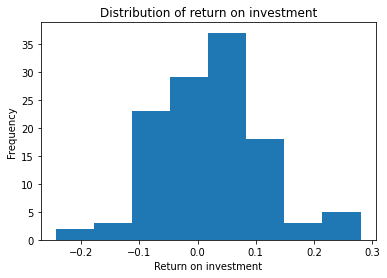

In [53]:
distribution = amazon['ROI']
classes = round(1 + 3.333 * np.log10(len(distribution)))

# Create the histogram
plt.hist(distribution, bins=classes)

# Add labels and title
plt.xlabel('Return on investment')
plt.ylabel('Frequency')
plt.title('Distribution of return on investment')

# Show the plot
plt.show()

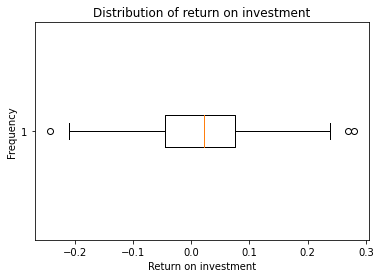

In [54]:
# Create the boxplot
plt.boxplot(distribution, vert = False)

# Add labels and title
plt.xlabel('Return on investment')
plt.ylabel('Frequency')
plt.title('Distribution of return on investment')

# Show the plot
plt.show()

In [55]:
norm_dist = distribution
fit_loc, fit_scale = stats.norm.fit(norm_dist)
# Print the estimated parameters
print("Estimated loc parameter (mu): ", fit_loc)
print("Estimated scale parameter (sigma): ", fit_scale)

Estimated loc parameter (mu):  0.02154060009909523
Estimated scale parameter (sigma):  0.09142094214250057


In [56]:
# Calculate the expected value
expected_value = stats.norm.mean(loc = fit_loc, scale = fit_scale)
print("The expectation of the random variable is: ", expected_value)

The expectation of the random variable is:  0.02154060009909523


In [57]:
# Calculate the variance
variance = stats.norm.var(loc = fit_loc, scale = fit_scale)
print("The variance of the random variable is: ", variance)

The variance of the random variable is:  0.008357788662222436


In [58]:
# Use goodness of fit test (Hypothesis testing) to validate the theoretical distribution

statistic, p_value = stats.shapiro(norm_dist)

# Print the test statistic and p-value
alpha = 0.02  # Significance level
print(f"Shapiro-Wilk Statistic: {statistic}")
print(f"P-value: {p_value}")

# Interpret the results
if p_value >= alpha:
    print("The data follows a normal distribution (not significant)")
else:
    print("The data does not follow a normal distribution (significant)")

Shapiro-Wilk Statistic: 0.9872650504112244
P-value: 0.32437413930892944
The data follows a normal distribution (not significant)


In [59]:
# Google
google = df[df['Asset'].isin(['GOOG'])]

print(google)

           Date Asset        Open        High         Low       Close  \
3    2013-09-01  GOOG   21.279240   22.565170   21.269028   21.815977   
20   2013-10-01  GOOG   21.924072   25.940767   20.995804   25.668289   
37   2013-11-01  GOOG   25.698425   26.600296   25.031178   26.390831   
54   2013-12-01  GOOG   26.488464   27.920347   26.127567   27.913124   
71   2014-01-01  GOOG   27.782366   29.552729   26.955713   29.414000   
...         ...   ...         ...         ...         ...         ...   
1958 2023-04-01  GOOG  102.669998  109.629997  102.379997  108.220001   
1975 2023-05-01  GOOG  107.720001  127.050003  104.500000  123.370003   
1992 2023-06-01  GOOG  123.500000  129.550003  116.910004  120.970001   
2009 2023-07-01  GOOG  120.320000  134.070007  115.830002  133.110001   
2026 2023-08-01  GOOG  130.854996  138.399994  127.000000  137.350006   

       Adj Close      Volume       ROI  
3      21.815977  1329906200  0.025224  
20     25.668289  2217259798  0.170781  


In [60]:
google.shape

(120, 9)

In [61]:
google.head()

,Date,Asset,Open,High,Low,Close,Adj Close,Volume,ROI
3,2013-09-01,GOOG,21.279240,22.565170,21.269028,21.815977,21.815977,1329906200,0.025224
20,2013-10-01,GOOG,21.924072,25.940767,20.995804,25.668289,25.668289,2217259798,0.170781
37,2013-11-01,GOOG,25.698425,26.600296,25.031178,26.390831,26.390831,1054200647,0.026944
54,2013-12-01,GOOG,26.488464,27.920347,26.127567,27.913124,27.913124,1358802104,0.053784
71,2014-01-01,GOOG,27.782366,29.552729,26.955713,29.414000,29.414000,2188640930,0.058729


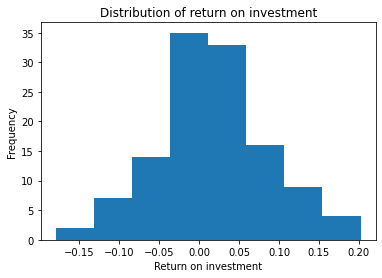

In [62]:
distribution = google['ROI']
classes = round(1 + 3.333 * np.log10(len(distribution)))

# Create the histogram
plt.hist(distribution, bins=classes)

# Add labels and title
plt.xlabel('Return on investment')
plt.ylabel('Frequency')
plt.title('Distribution of return on investment')

# Show the plot
plt.show()

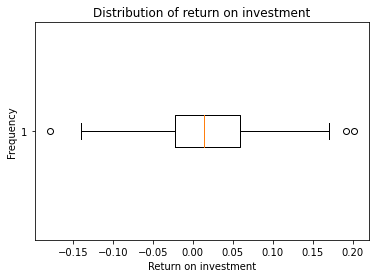

In [63]:
# Create the boxplot
plt.boxplot(distribution, vert = False)

# Add labels and title
plt.xlabel('Return on investment')
plt.ylabel('Frequency')
plt.title('Distribution of return on investment')

# Show the plot
plt.show()

In [64]:
norm_dist = distribution
fit_loc, fit_scale = stats.norm.fit(norm_dist)
# Print the estimated parameters
print("Estimated loc parameter (mu): ", fit_loc)
print("Estimated scale parameter (sigma): ", fit_scale)

Estimated loc parameter (mu):  0.018025650642120954
Estimated scale parameter (sigma):  0.06962576030785872


In [65]:
# Calculate the expected value
expected_value = stats.norm.mean(loc = fit_loc, scale = fit_scale)
print("The expectation of the random variable is: ", expected_value)

The expectation of the random variable is:  0.018025650642120954


In [66]:
# Calculate the variance
variance = stats.norm.var(loc = fit_loc, scale = fit_scale)
print("The variance of the random variable is: ", variance)

The variance of the random variable is:  0.0048477464984473945


In [67]:
# Use goodness of fit test (Hypothesis testing) to validate the theoretical distribution

statistic, p_value = stats.shapiro(norm_dist)

# Print the test statistic and p-value
alpha = 0.02  # Significance level
print(f"Shapiro-Wilk Statistic: {statistic}")
print(f"P-value: {p_value}")

# Interpret the results
if p_value >= alpha:
    print("The data follows a normal distribution (not significant)")
else:
    print("The data does not follow a normal distribution (significant)")

Shapiro-Wilk Statistic: 0.9925503134727478
P-value: 0.7720939517021179
The data follows a normal distribution (not significant)
